In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import make_data

import warnings
import importlib

warnings.filterwarnings("ignore")
importlib.reload(make_data)

<module 'make_data' from '/projects/f4382cdc-d929-4012-9815-0c5eb2f78b8d/Notebooks/make_data.py'>

In [2]:
bat = pd.read_csv("../Data/all_season_batting_card.csv")
bowl = pd.read_csv("../Data/all_season_bowling_card.csv")
full = pd.read_csv("../Data/all_season_details.csv")

df = make_data.make_data(bat, bowl, full)
df.head()

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,current_innings,runs,ball,venue,...,avg_noballs,total_overs,total_maidens,total_conceded,total_wickets,total_dots,total_fours_c,total_sixes_c,total_wides,total_noballs
0,2008,335982,Ashley Noffke,Ajit Agarkar,RCB,KKR,RCB,2,6,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2
16,2008,335982,Balachandra Akhil,Ajit Agarkar,RCB,KKR,RCB,0,2,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2
32,2008,335982,Cameron White,Ajit Agarkar,RCB,KKR,RCB,3,6,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2
48,2011,501223,David Hussey,Ajit Agarkar,DC,KXIP,KXIP,4,2,"Arun Jaitley Stadium, Delhi",...,0.047619,130.2,0,1151,29,273,113,41,36,2
62,2008,335982,Jacques Kallis,Ajit Agarkar,RCB,KKR,RCB,7,4,"M.Chinnaswamy Stadium, Bengaluru",...,0.047619,130.2,0,1151,29,273,113,41,36,2


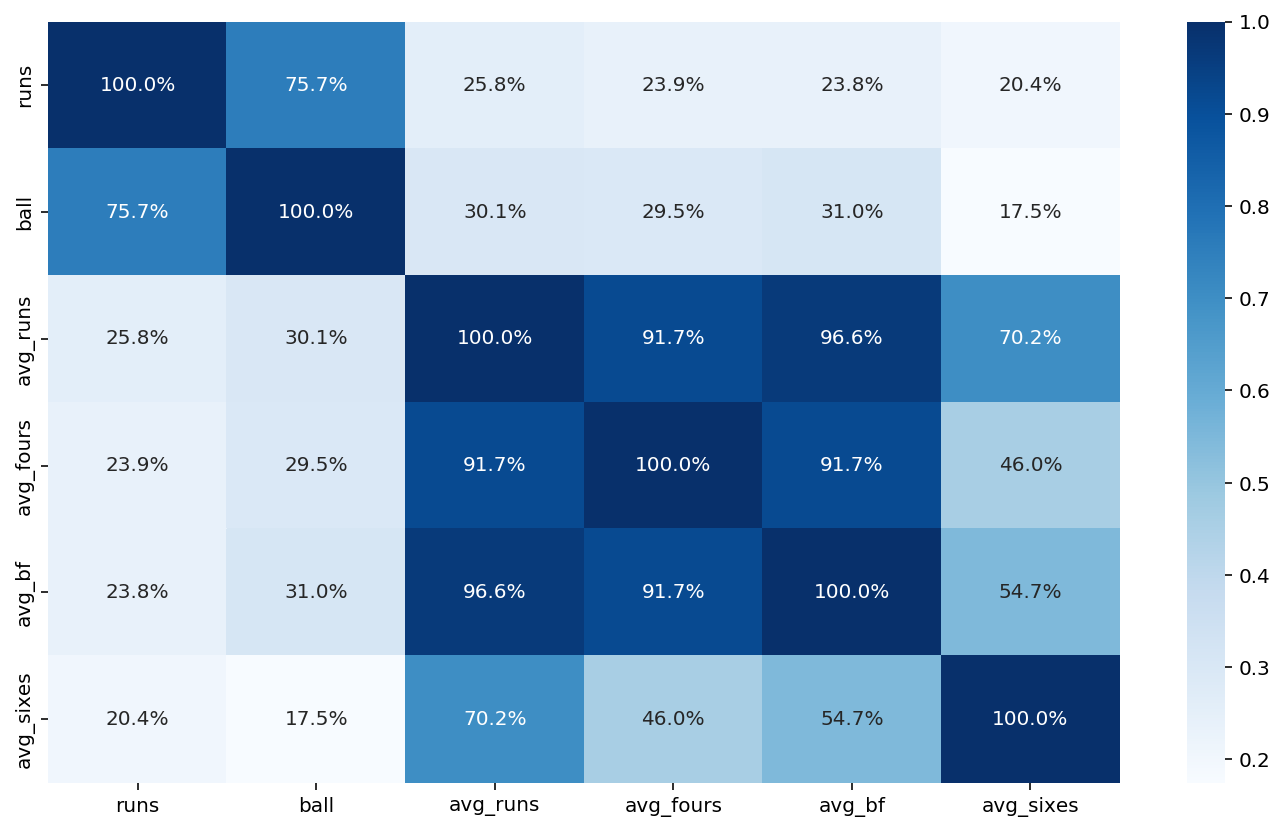

In [3]:
corr_matrix = df.corr()
runs_corr = corr_matrix["runs"].sort_values(ascending = False).reset_index()
runs_corr = runs_corr.loc[0:5, :]
top_five = runs_corr["index"].tolist()
sns.heatmap(corr_matrix.loc[top_five, top_five], annot = True, cmap = "Blues", fmt = ".1%")

In [8]:
total_home_runs = df.groupby("home_team")["runs"].sum()
total_away_runs = df.groupby("away_team")["runs"].sum()

curr_teams = ["CSK", "MI", "DC", "SRH", "RCB", "RR", "KKR", "PBKS"]

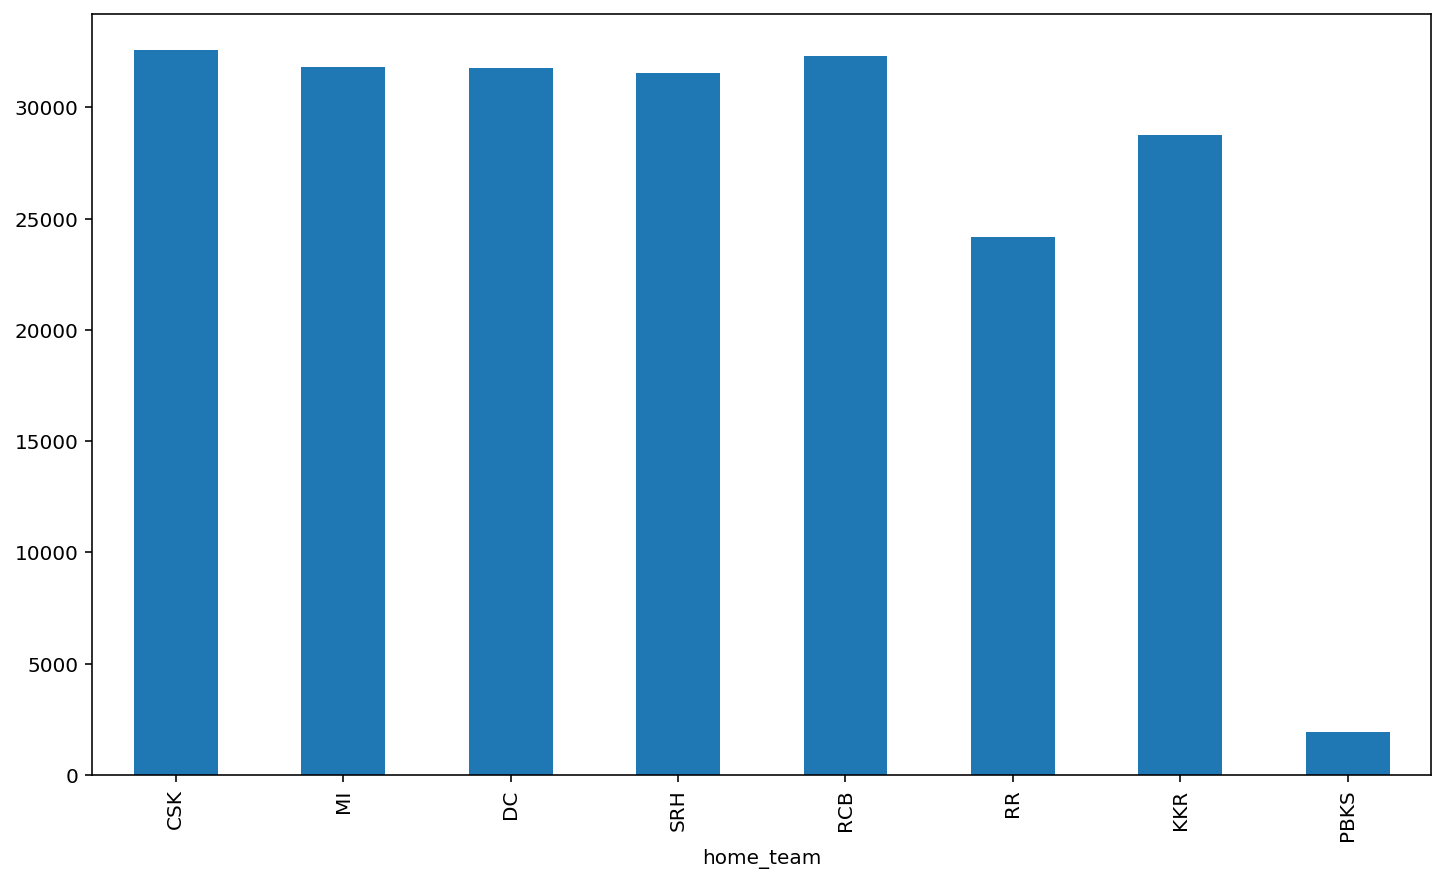

In [11]:
total_home_runs[curr_teams].plot(kind = "bar")

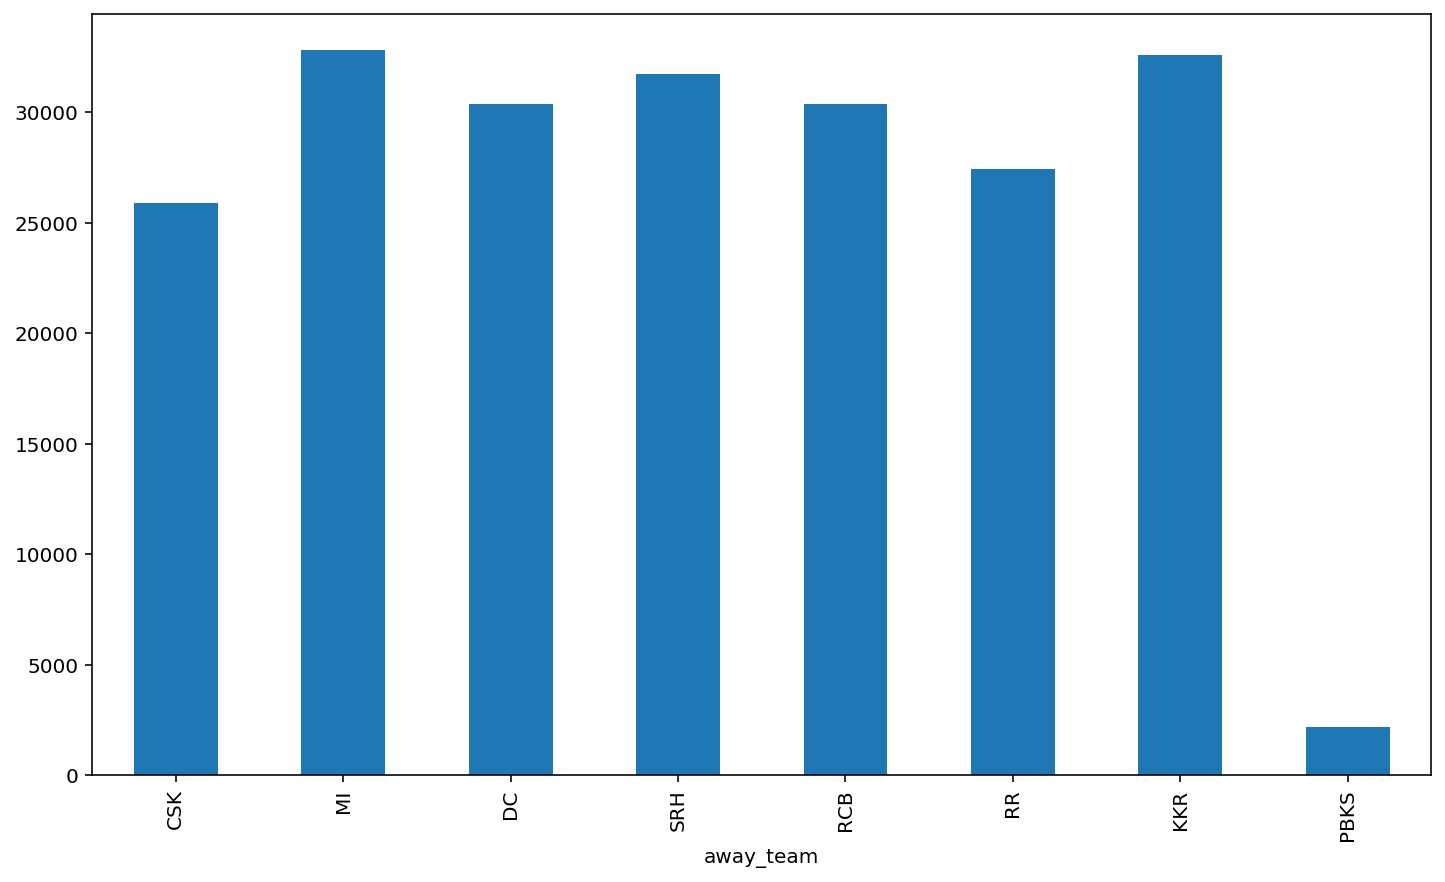

In [12]:
total_away_runs[curr_teams].plot(kind = "bar")

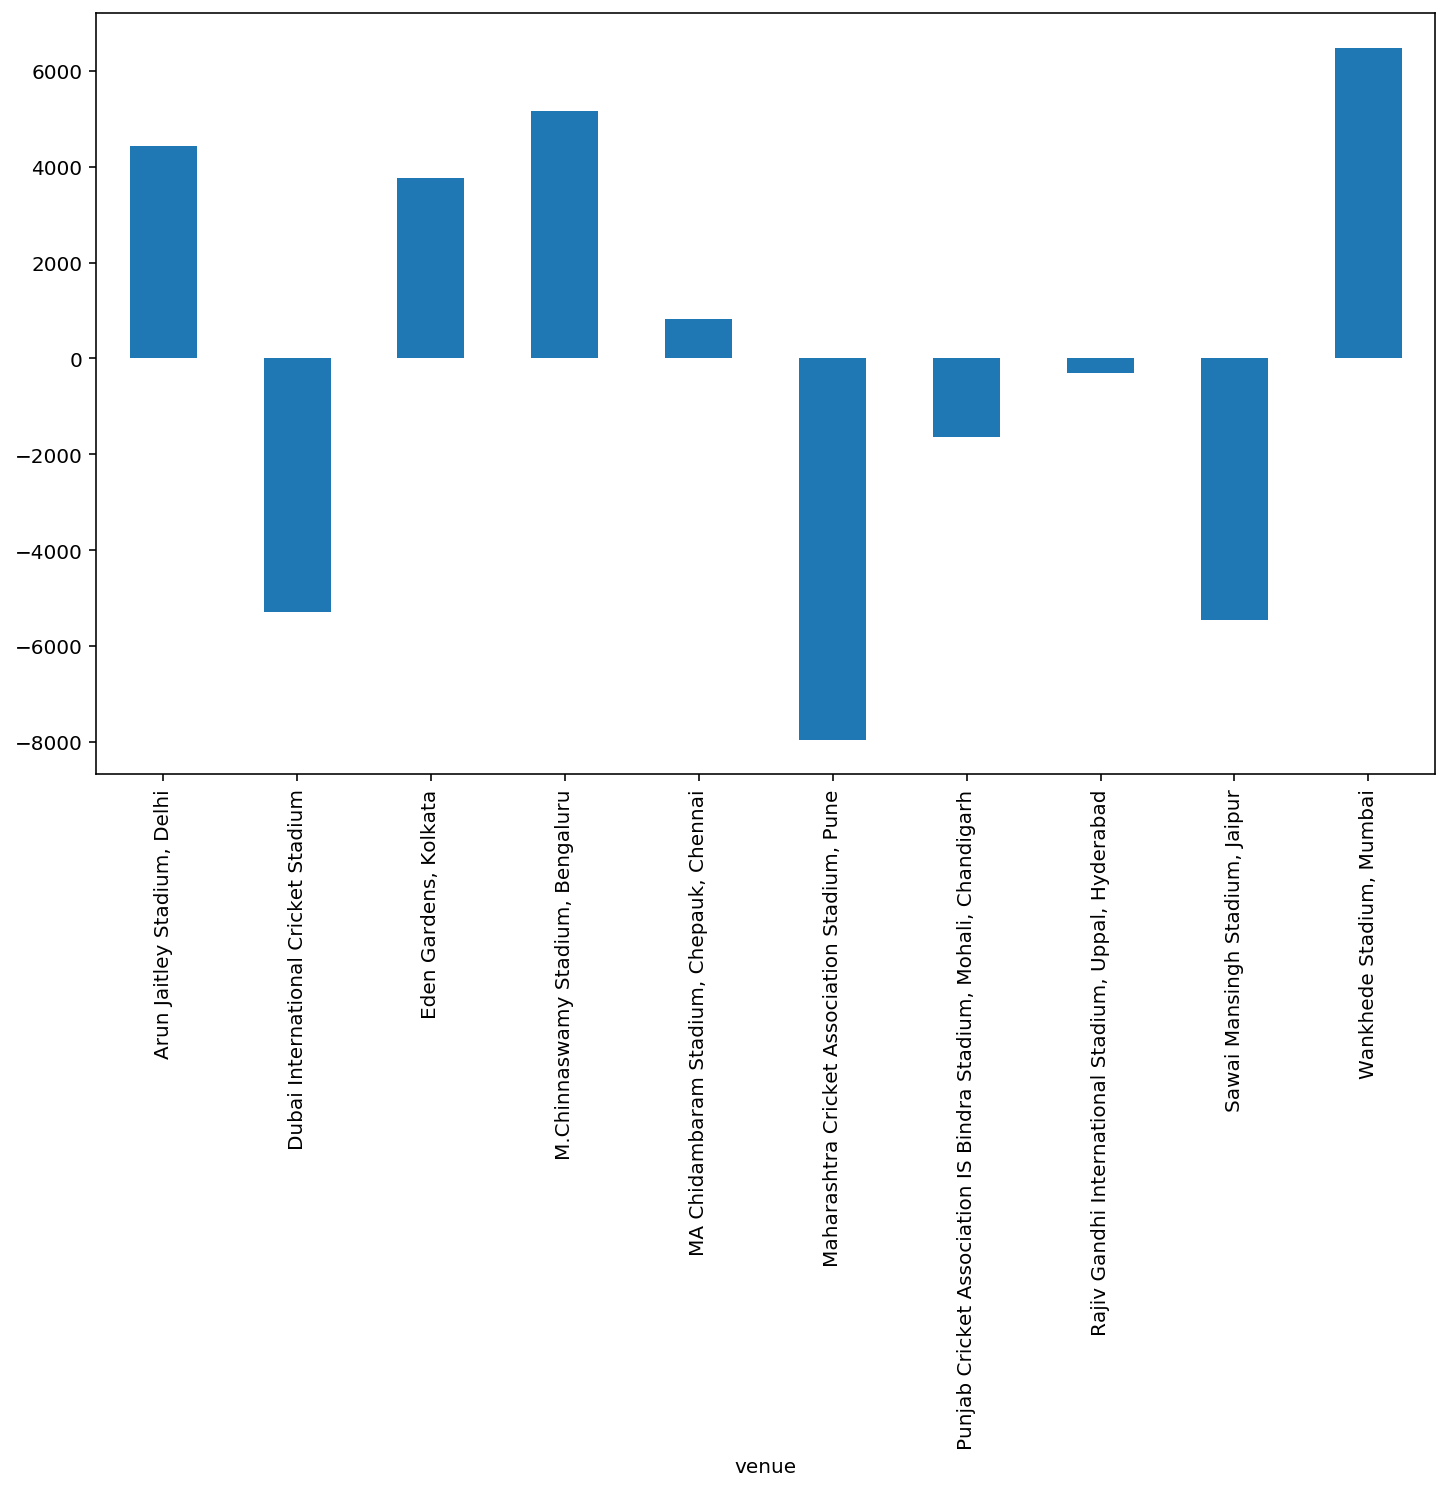

In [13]:
top_stadiums = df.groupby("venue").size().sort_values(ascending = False)[0:10].index.tolist()
ts = df[df["venue"].isin(top_stadiums)]

mean_runs_by_venue = ts.groupby("venue")["runs"].sum()
mean_runs_by_venue = mean_runs_by_venue - (mean_runs_by_venue.mean())
mean_runs_by_venue.plot(kind = "bar")

In [5]:
corr_matrix.loc[top_five, top_five]

,runs,ball,avg_runs,avg_fours,avg_bf,avg_sixes
runs,1.000000,0.757104,0.258444,0.239287,0.237983,0.204236
ball,0.757104,1.000000,0.301006,0.294864,0.310276,0.174829
avg_runs,0.258444,0.301006,1.000000,0.916644,0.965561,0.702383
avg_fours,0.239287,0.294864,0.916644,1.000000,0.917454,0.460319
avg_bf,0.237983,0.310276,0.965561,0.917454,1.000000,0.547113
avg_sixes,0.204236,0.174829,0.702383,0.460319,0.547113,1.000000


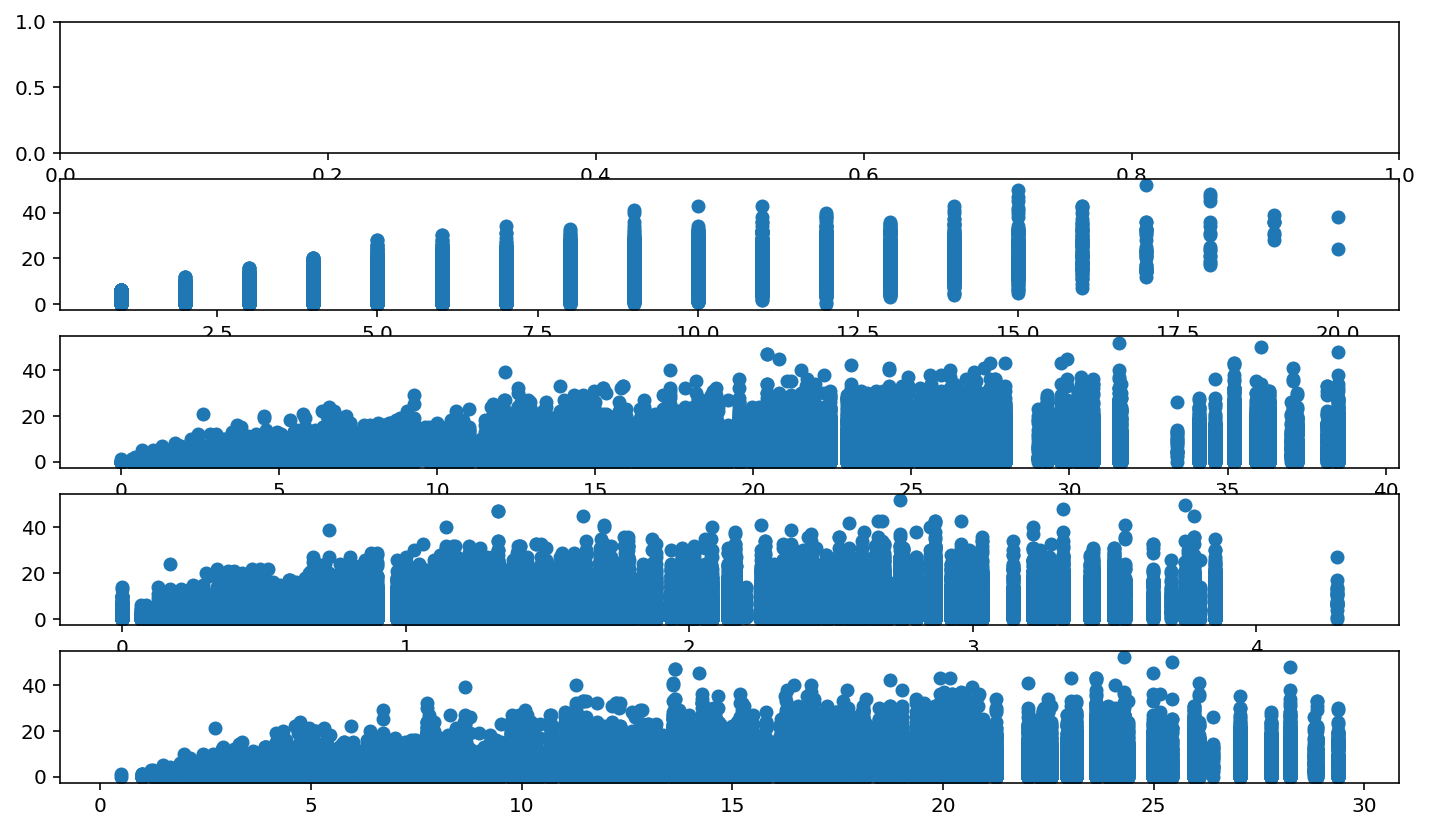

In [11]:
fig, ax = plt.subplots(5)
for i in range(1, 5, 1):
    ax[i].scatter(x = df[top_five[i]], y = df["runs"])

plt.show()